## Bank Telemarketing Campaign By `Abhijeet Lohar`

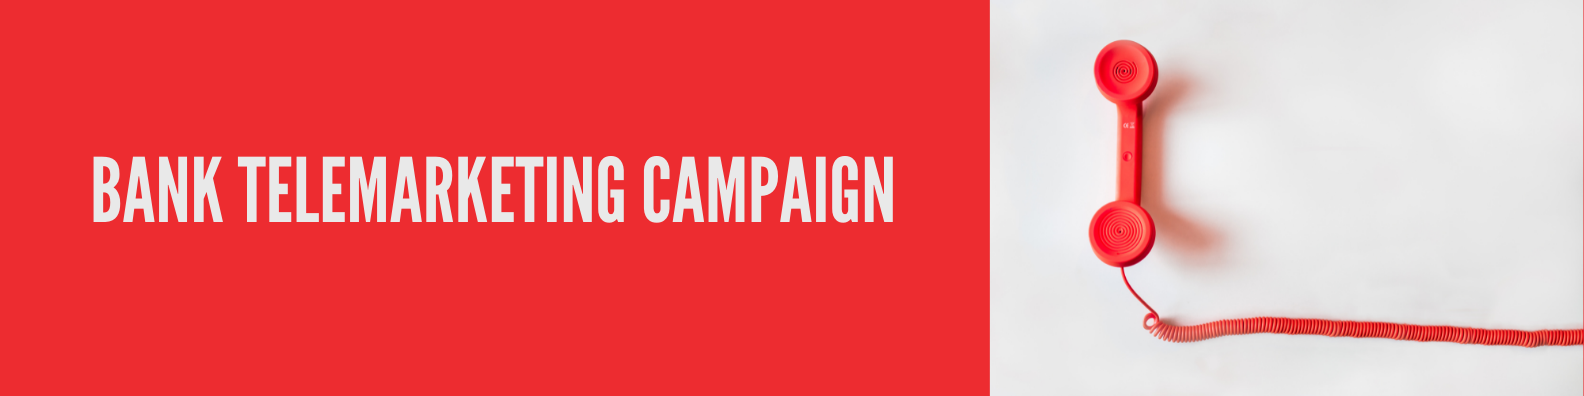

#### Problem Statement:

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

Your target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate. 

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading the dataset containing attribute details
attribute= pd.read_excel("Attribute details.xlsx")
attribute.columns = ['Attribute','Details']
attribute.style

,Attribute,Details
0,Customer id,This column is about the id of the customer contacted
1,age,This column consists of the age of each customer
2,salary,This column represents monthly salary of the customer
3,balance,This column represents the cash balance in the bank account of the customer
4,marital,This column consists of the information about the marital status of each customer.
5,jobedu,This column consists of the information about the job and education of each cutomer
6,targeted,nan
7,default,"This column consists of two categorical variables ‘yes’ & ‘no’, where Yes - represents if the customer has defaulted any loan no - represents if the customer has not defaulted any loan"
8,housing,"This column consists of the two categorical variables ‘yes’ & ‘no’, where yes - represents if the customer has taken housing loan no - represents if the customer has not taken the housing loan"
9,loan,"This column consists of the two categorical variables ‘yes’ & ‘no’, where yes - represents if the customer has taken personal loan no - represents if the customer has not taken the personal loan"


In [4]:
#read the data set of "bank telemarketing campaign" in data.
data= pd.read_csv("bank_marketing_updated_v1.csv",skiprows=2)

In [5]:
#Print the head of the data frame.
data.head(2)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no


In [6]:
# Check the number of rows and columns in the dataframe
data.shape

(45211, 19)

In [7]:
# Check the column-wise info of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

#### ~Cleaning dataset 

In [8]:
#drop the customer id as it is of no use.
data.drop("customerid",axis=1,inplace=True)
data.head(2)

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no


In [9]:
#Extract job in newly created 'job' column from "jobedu" column.
data['job']=data.jobedu.apply(lambda x: x.split(",")[0])
data.head(2)

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician


In [10]:
#Extract education in newly created 'education' column from "jobedu" column.
data['education']= data.jobedu.apply(lambda x: x.split(",")[1])
data.head(2)

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary


In [11]:
#drop the "jobedu" column from the dataframe.
data.drop("jobedu",axis=1,inplace= True)
data.head(2)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary


In [12]:
#count the missing values in age column.
data.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [13]:
#checking for percentage of null values
(data.isnull().sum() * 100 / len(data)).sort_values(ascending=False)

month        0.110593
response     0.066356
age          0.044237
job          0.000000
poutcome     0.000000
previous     0.000000
pdays        0.000000
campaign     0.000000
duration     0.000000
day          0.000000
salary       0.000000
contact      0.000000
loan         0.000000
housing      0.000000
default      0.000000
targeted     0.000000
marital      0.000000
balance      0.000000
education    0.000000
dtype: float64

In [14]:
#drop the records with age missing in dataframe.
data= data[~data.age.isnull()]
(data.isnull().sum() * 100 / len(data)).sort_values(ascending=False)

month        0.110641
response     0.066385
age          0.000000
job          0.000000
poutcome     0.000000
previous     0.000000
pdays        0.000000
campaign     0.000000
duration     0.000000
day          0.000000
salary       0.000000
contact      0.000000
loan         0.000000
housing      0.000000
default      0.000000
targeted     0.000000
marital      0.000000
balance      0.000000
education    0.000000
dtype: float64

In [15]:
#print the percentage of each month in the data frame data.
data.month.value_counts(normalize=True)

may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: month, dtype: float64

In [16]:
#find the mode of month in data
month_mode=data.month.mode()[0]
month_mode

'may, 2017'

In [17]:
# fill the missing values with mode value of month in data.
data.month.fillna(month_mode,inplace=True)
data.month.value_counts(normalize=True)

may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: month, dtype: float64

In [18]:
data['month'].isnull().sum()

0

In [19]:
#drop the records with response missings in inp1.
data=data[~data.response.isnull()]
(data.isnull().sum() * 100 / len(data)).sort_values(ascending=False)

age          0.0
month        0.0
job          0.0
response     0.0
poutcome     0.0
previous     0.0
pdays        0.0
campaign     0.0
duration     0.0
day          0.0
salary       0.0
contact      0.0
loan         0.0
housing      0.0
default      0.0
targeted     0.0
marital      0.0
balance      0.0
education    0.0
dtype: float64

In [20]:
data.head(2)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary


In [21]:
#checking values if there are correct and not duplicate 
data.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [22]:
data.targeted.unique()

array(['yes', 'no'], dtype=object)

In [23]:
data.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [24]:
data.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [25]:
data.pdays.unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 116, 173, 178, 110, 115, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

-1 indicates the missing values.

Therfore handling it:

Objective is:
- you should ignore the missing values in the calculations
- simply make it missing - replace -1 with NaN.
- all summary statistics- mean, median etc. we will ignore the missing values of pdays.

In [26]:
#therefore replacing -1 with nan
data.loc[data.pdays<0,"pdays"]=np.NaN
data.pdays.unique()

array([ nan, 151., 166.,  91.,  86., 143., 147.,  89., 140., 176., 101.,
       174., 170., 167., 195., 165., 129., 188., 196., 172., 118., 119.,
       104., 171., 117., 164., 132., 131., 123., 159., 186., 111., 116.,
       173., 178., 110., 115., 152.,  96., 103., 150., 175., 193., 181.,
       185., 154., 145., 138., 126., 180., 109., 158., 168.,  97., 182.,
       127., 130., 194., 125., 105., 102.,  26., 179.,  28., 183., 155.,
       112., 120., 137., 124., 187., 190., 113., 162., 134., 169., 189.,
         8., 144., 191., 184., 177.,   5.,  99., 133.,  93.,  92.,  10.,
       100., 156., 198., 106., 153., 146., 128.,   7., 121., 160., 107.,
        90.,  27., 197., 136., 139., 122., 157., 149., 135.,  30., 114.,
        98., 192., 163.,  34.,  95., 141.,  31., 199.,  94., 108.,  29.,
       268., 247., 253., 226., 244., 239., 245., 204., 231., 238., 258.,
       230., 254., 265.,  71., 223., 246., 250., 266., 240., 205., 261.,
       259., 241., 260., 234., 251., 225., 161., 23

#### Age variable 

In [27]:
#describe the age variable in data.
data.age.describe()

count    45161.000000
mean        40.935763
std         10.618790
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

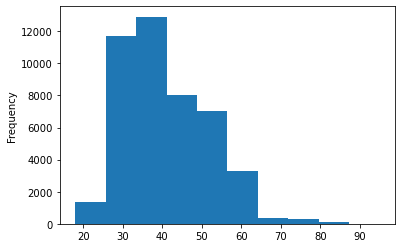

In [28]:
#plot the histogram of age variable.
data.age.plot.hist()
plt.show()

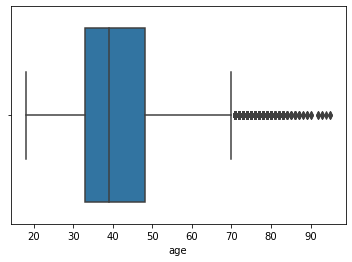

In [29]:
#plot the boxplot of age variable.
sns.boxplot(data.age)
plt.show()

#### Salary variable 

In [30]:
#describe the salary variable of data.
data.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

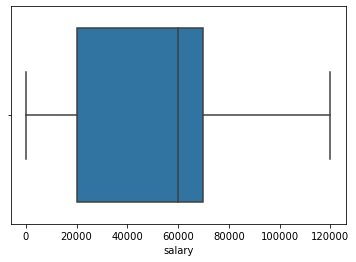

In [31]:
#plot the boxplot of salary variable.
sns.boxplot(data.salary)
plt.show()

#### Balance variable 

In [32]:
#describe the balance variable of data.
data.balance.describe()

count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

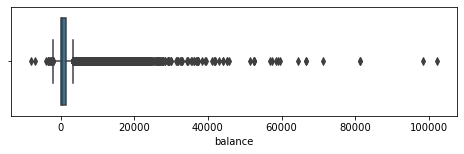

In [33]:
#plot the boxplot of balance variable.
plt.figure(figsize=[8,2])
sns.boxplot(data.balance)
plt.show()


#### Duration variable

In [34]:
#describe the duration variable of data
data.duration.describe()

count       45161
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [35]:
data.duration.head()

0    261 sec
1    151 sec
2     76 sec
3     92 sec
4    198 sec
Name: duration, dtype: object

In [36]:
#convert the duration variable into single unit i.e. minutes. and remove the sec or min prefix.
data.duration=data.duration[:5].apply(lambda x :float(x.split()[0])/60 if x.find("sec")>0 else float(x.split()[0]))

In [37]:
#describe the duration variable of data
data.duration.describe()

count    5.000000
mean     2.593333
std      1.272279
min      1.266667
25%      1.533333
50%      2.516667
75%      3.300000
max      4.350000
Name: duration, dtype: float64

#### Marital status 

In [38]:
#calculate the percentage of each marital status category. 
data.marital.value_counts(normalize=True)

married     0.601957
single      0.282943
divorced    0.115099
Name: marital, dtype: float64

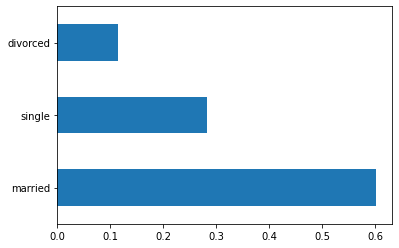

In [39]:
#plot the bar graph of percentage marital status categories
data.marital.value_counts(normalize=True).plot.barh()
plt.show()

#### Job  

In [40]:
#calculate the percentage of each job status category.
data.job.value_counts(normalize=True)

blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: job, dtype: float64

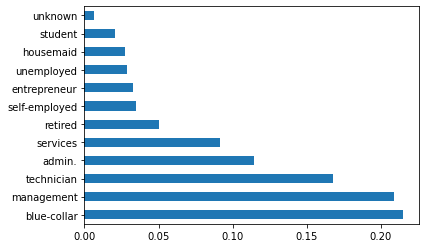

In [41]:
#plot the bar graph of percentage job categories
data.job.value_counts(normalize=True).plot.barh()
plt.show()

#### Education

In [42]:
#calculate the percentage of each education category.
data.education.value_counts(normalize=True)

secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: education, dtype: float64

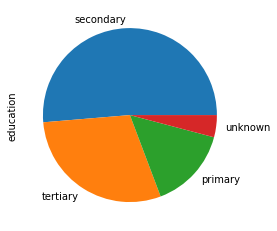

In [43]:
#plot the pie chart of education categories
data.education.value_counts(normalize=True).plot.pie()
plt.show()

#### poutcome

In [44]:
#calculate the percentage of each poutcome category.
data.poutcome.value_counts(normalize=True)

unknown    0.817520
failure    0.108368
other      0.040721
success    0.033392
Name: poutcome, dtype: float64

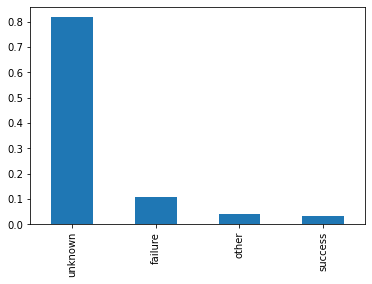

In [45]:
#plot for poutcome
data.poutcome.value_counts(normalize=True).plot.bar()
plt.show()

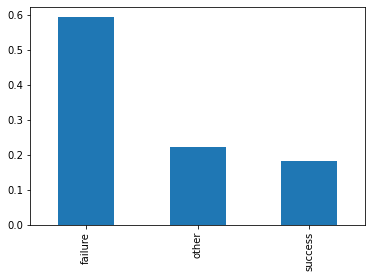

In [46]:
#plot for poutcome excluding unknown
data[~(data.poutcome=="unknown")].poutcome.value_counts(normalize=True).plot.bar()
plt.show()

#### Response the target variable 

In [47]:
#calculate the percentage of each response category.
data.response.value_counts(normalize=True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

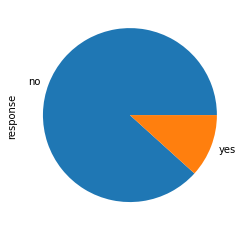

In [48]:
#plot the pie chart of response categories
data.response.value_counts(normalize=True).plot.pie()
plt.show()

#### Bivariate and Multivariate Analysis
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

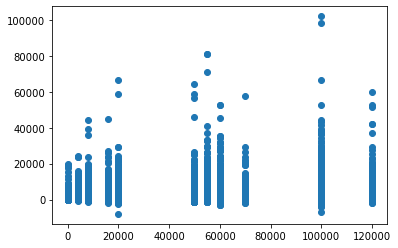

In [49]:
#plot the scatter plot of balance and salary variable in data
plt.scatter(data.salary,data.balance)
plt.show()

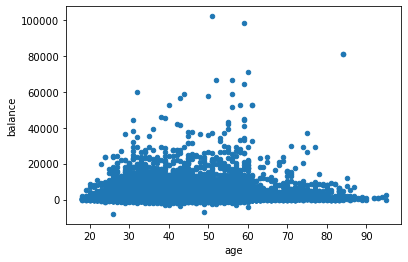

In [50]:
#plot the scatter plot of balance and age variable in data
data.plot.scatter(x="age",y="balance")
plt.show()

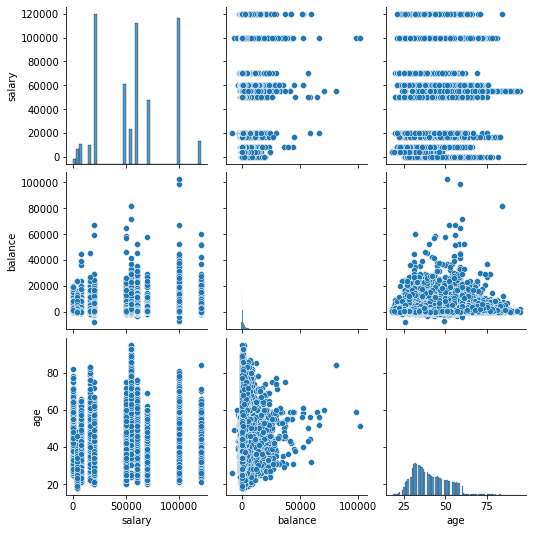

In [51]:
#plot the pair plot of salary, balance and age in data dataframe.
sns.pairplot(data=data,vars=["salary","balance","age"])
plt.show()

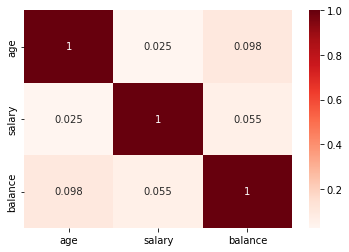

In [52]:
#plot the correlation matrix of salary, balance and age in data dataframe.
data[["age","salary","balance"]].corr()
sns.heatmap(data[["age","salary","balance"]].corr(),annot=True,cmap="Reds")
plt.show()

#### Salary vs response 

In [53]:
#groupby the response to find the mean of the salary with response no & yes seperatly.
data.groupby("response")["salary"].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

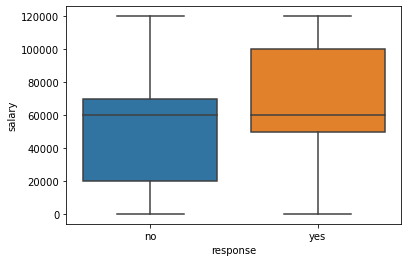

In [54]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(data=data,x="response",y="salary")
plt.show()

#### Balance vs response 

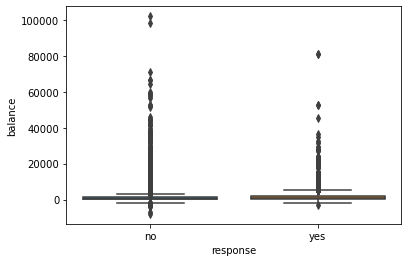

In [55]:
#plot the box plot of balance for yes & no responses.
sns.boxplot(data=data,x="response",y="balance")
plt.show()

In [56]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
data.groupby("response")["balance"].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [57]:
#groupby the response to find the median of the balance with response no & yes seperatly.
data.groupby("response")["balance"].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

In [58]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [59]:
#calculate the mean, median and 75th percentile of balance with response
data.groupby("response")["balance"].aggregate(["mean","median",p75])

,mean,median,p75
response,,,
no,1304.292281,417.0,1345.0
yes,1804.681362,733.0,2159.0


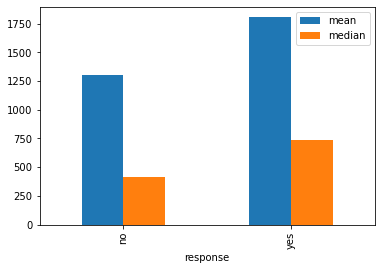

In [60]:
#plot the bar graph of balance's mean an median with response.
data.groupby("response")["balance"].aggregate(["mean","median"]).plot.bar()
plt.show()

#### Education vs salary 

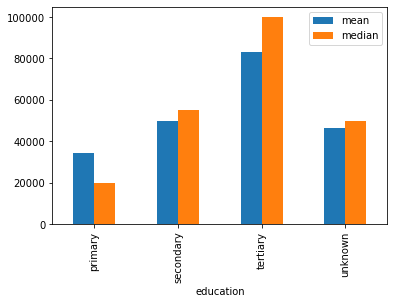

In [62]:
#groupby the education to find the mean of the salary education category.
data.groupby("education")["salary"].aggregate(["mean","median"]).plot.bar()
plt.show()

#### Job vs salary

In [63]:
#groupby the job to find the mean of the salary for each job category.
data.groupby("job")["salary"].aggregate(["mean","median"])

,mean,median
job,,
admin.,50000.0,50000.0
blue-collar,20000.0,20000.0
entrepreneur,120000.0,120000.0
housemaid,16000.0,16000.0
management,100000.0,100000.0
retired,55000.0,55000.0
self-employed,60000.0,60000.0
services,70000.0,70000.0
student,4000.0,4000.0


#### converting categorical variable 'response' into numeric

In [64]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0
data["response_flag"]=np.where(data.response=="yes",1,0)
data.response_flag.value_counts()

0    39876
1     5285
Name: response_flag, dtype: int64

In [65]:
data.response.value_counts()

no     39876
yes     5285
Name: response, dtype: int64

In [66]:
data.response_flag.mean()

0.1170257523084077

#### Education vs response rate

In [68]:
#calculate the mean of response_flag with different education categories.
data.groupby(["education"])["response_flag"].mean()

education
primary      0.086416
secondary    0.105608
tertiary     0.150083
unknown      0.135776
Name: response_flag, dtype: float64

In [74]:
#which education has highest response rate
data.groupby(["education"])["response_flag"].value_counts(normalize=True)

education  response_flag
primary    0                0.913584
           1                0.086416
secondary  0                0.894392
           1                0.105608
tertiary   0                0.849917
           1                0.150083
unknown    0                0.864224
           1                0.135776
Name: response_flag, dtype: float64

<AxesSubplot:ylabel='education'>

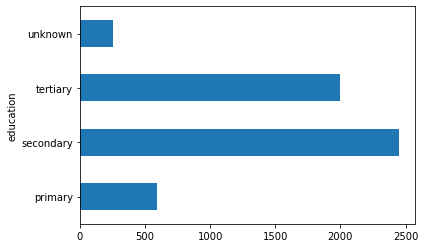

In [77]:
#plot education and response rate
data.groupby(["education"])["response_flag"].sum().plot.barh()

#### Marital vs response rate 

In [72]:
#calculate the mean of response_flag with different marital status categories.
data.groupby(["marital"])["response_flag"].mean()

marital
divorced    0.119469
married     0.101269
single      0.149554
Name: response_flag, dtype: float64

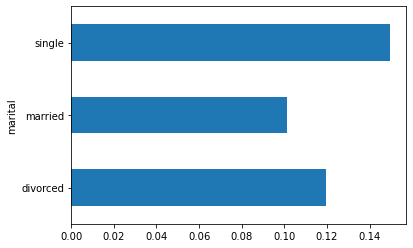

In [73]:
#plot the bar graph of marital status with average value of response_flag
data.groupby(["marital"])["response_flag"].mean().plot.barh()
plt.show()

#### Loans vs response rate 

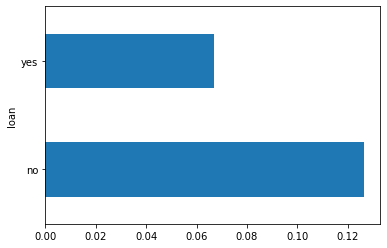

In [78]:
#plot the bar graph of personal loan status with average value of response_flag
data.groupby(["loan"])["response_flag"].mean().plot.barh()
plt.show()

#### Housing loans vs response rate 

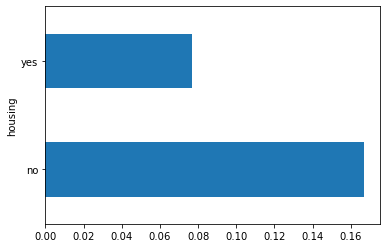

In [79]:
#plot the bar graph of housing loan status with average value of response_flag
data.groupby(["housing"])["response_flag"].mean().plot.barh()
plt.show()

#### Age vs response 

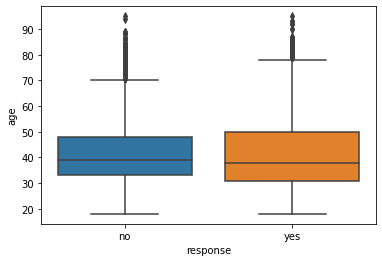

In [80]:
#plot the boxplot of age with response_flag
sns.boxplot(data=data,x="response",y="age")
plt.show()

##### making buckets from age columns 

In [82]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
data["age_group"]=pd.cut(data.age,[0,30,40,50,60,999],labels=["<30","30-40","40-50","50-60","60+"])

In [83]:
data.age_group.value_counts(normalize=True)

30-40    0.391090
40-50    0.248688
50-60    0.178406
<30      0.155555
60+      0.026262
Name: age_group, dtype: float64

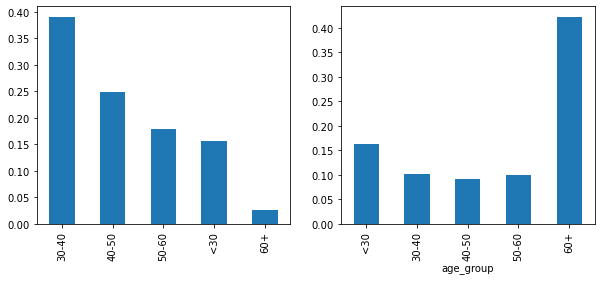

In [85]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
data.age_group.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
data.groupby(["age_group"])["response_flag"].mean().plot.bar()
plt.show()

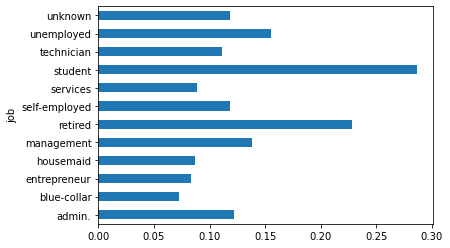

In [87]:
#plot the bar graph of job categories with response_flag mean value.
data.groupby(["job"])["response_flag"].mean().plot.barh()
plt.show()

#### Education vs marital vs response 

In [88]:
#create heat map of education vs marital vs response_flag
res=pd.pivot_table(data=data,index="education",columns="marital",values="response_flag")

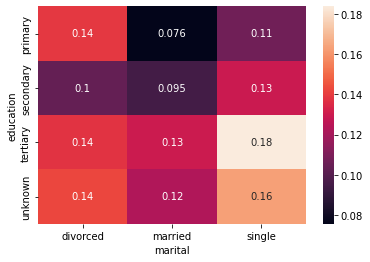

In [90]:
sns.heatmap(res,annot=True)
plt.show()

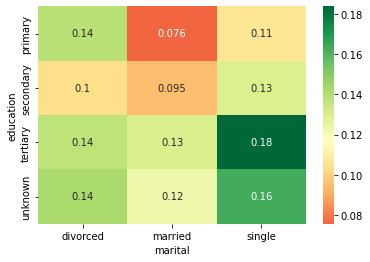

In [91]:
sns.heatmap(res,annot=True,cmap="RdYlGn",center=0.117)
plt.show()

#### Job vs marital vs response 

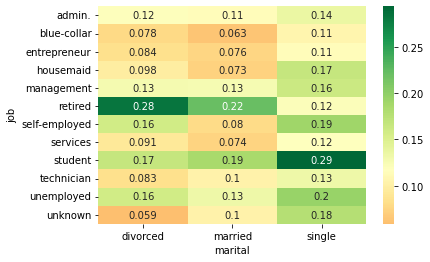

In [92]:
#create the heat map of Job vs marital vs response_flag.
res_1=pd.pivot_table(data=data,index="job",columns="marital",values="response_flag")
sns.heatmap(res_1,annot=True,cmap="RdYlGn",center=0.117)
plt.show()

#### Education vs poutcome vs response

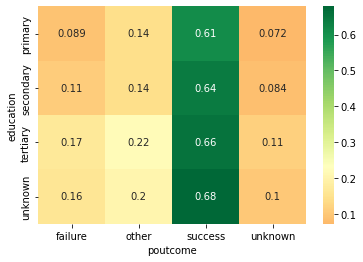

In [93]:
#create the heat map of education vs poutcome vs response_flag.
res_2=pd.pivot_table(data=data,index="education",columns="poutcome",values="response_flag")
sns.heatmap(res_2,annot=True,cmap="RdYlGn",center=0.2308)
plt.show()

### Conclusion
The EDA clearly show how the salary, eduction, marital status, balance, job , loan etc. is directly
reponsible for the positive outcome, hence the above graphs gives a clear indication on which type of customer 
should bank focus for marketing. 